<a href="https://colab.research.google.com/github/darko-k/MasterPy/blob/master/passport_work%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


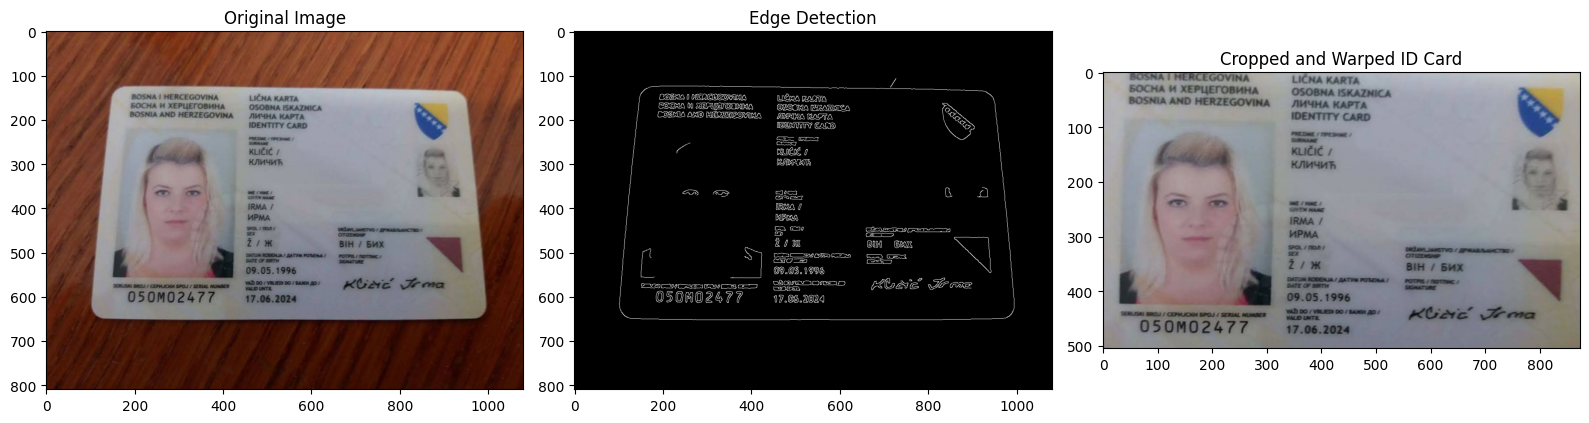

In [ ]:
# Install required libraries (if not already installed)
!pip install opencv-python-headless matplotlib

# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to the image in Google Drive
image_path = "/content/drive/MyDrive/MyFolder/passport/FB_IMG_2.jpg"

# Read the image
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise and improve edge detection
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Detect edges using the Canny method
edges = cv2.Canny(blurred, 50, 150)

# Find contours based on the edges
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the largest contour (assumed to be the ID card)
largest_contour = max(contours, key=cv2.contourArea)

# Approximate the contour to a polygon
epsilon = 0.02 * cv2.arcLength(largest_contour, True)
approx = cv2.approxPolyDP(largest_contour, epsilon, True)

# Ensure the contour has four points (indicating a quadrilateral)
if len(approx) == 4:
    # Sort points in a consistent order: top-left, top-right, bottom-right, bottom-left
    points = approx.reshape(4, 2)
    points = sorted(points, key=lambda x: (x[1], x[0]))  # Sort by y, then x

    top_points = sorted(points[:2], key=lambda x: x[0])  # Sort top two by x
    bottom_points = sorted(points[2:], key=lambda x: x[0])  # Sort bottom two by x

    ordered_points = np.array([top_points[0], top_points[1], bottom_points[1], bottom_points[0]], dtype="float32")

    # Define the width and height of the new image
    width = int(max(np.linalg.norm(ordered_points[0] - ordered_points[1]),
                    np.linalg.norm(ordered_points[2] - ordered_points[3])))
    height = int(max(np.linalg.norm(ordered_points[0] - ordered_points[3]),
                     np.linalg.norm(ordered_points[1] - ordered_points[2])))

    # Destination points for the perspective transformation
    dst_points = np.array([[0, 0], [width-1, 0], [width-1, height-1], [0, height-1]], dtype="float32")

    # Compute the perspective transform matrix and apply it
    matrix = cv2.getPerspectiveTransform(ordered_points, dst_points)
    warped = cv2.warpPerspective(image, matrix, (width, height))

    # Display the results
    plt.figure(figsize=(16, 8))
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    plt.subplot(1, 3, 2)
    plt.title("Edge Detection")
    plt.imshow(edges, cmap='gray')

    plt.subplot(1, 3, 3)
    plt.title("Cropped and Warped ID Card")
    plt.imshow(cv2.cvtColor(warped, cv2.COLOR_BGR2RGB))

    plt.tight_layout()
    plt.show()
else:
    print("The detected contour does not have four sides and cannot be warped.")

In [ ]:
# Install required libraries (if not already installed)
!pip install opencv-python-headless matplotlib

# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to the image in Google Drive
image_path = "/content/drive/MyDrive/MyFolder/passport/FB_IMG_1.jpg"

# Read the image
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise and improve edge detection
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Detect edges using the Canny method
edges = cv2.Canny(blurred, 50, 150)

# Find contours based on the edges
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the largest contour (assumed to be the ID card)
largest_contour = max(contours, key=cv2.contourArea)

# Approximate the contour to a polygon
epsilon = 0.02 * cv2.arcLength(largest_contour, True)
approx = cv2.approxPolyDP(largest_contour, epsilon, True)

# Ensure the contour has four points (indicating a quadrilateral)
if len(approx) == 4:
    # Sort points in a consistent order: top-left, top-right, bottom-right, bottom-left
    points = approx.reshape(4, 2)
    points = sorted(points, key=lambda x: (x[1], x[0]))  # Sort by y, then x

    top_points = sorted(points[:2], key=lambda x: x[0])  # Sort top two by x
    bottom_points = sorted(points[2:], key=lambda x: x[0])  # Sort bottom two by x

    ordered_points = np.array([top_points[0], top_points[1], bottom_points[1], bottom_points[0]], dtype="float32")

    # Define the width and height of the new image
    width = int(max(np.linalg.norm(ordered_points[0] - ordered_points[1]),
                    np.linalg.norm(ordered_points[2] - ordered_points[3])))
    height = int(max(np.linalg.norm(ordered_points[0] - ordered_points[3]),
                     np.linalg.norm(ordered_points[1] - ordered_points[2])))

    # Shrink the dimensions slightly
    shrink_amount = 5  # Adjust this value as needed
    width = max(1, width - 2 * shrink_amount)
    height = max(1, height - 2 * shrink_amount)

    # Destination points for the perspective transformation
    dst_points = np.array([[shrink_amount, shrink_amount],
                           [width - 1 + shrink_amount, shrink_amount],
                           [width - 1 + shrink_amount, height - 1 + shrink_amount],
                           [shrink_amount, height - 1 + shrink_amount]], dtype="float32")

    # Compute the perspective transform matrix and apply it
    matrix = cv2.getPerspectiveTransform(ordered_points, dst_points)
    warped = cv2.warpPerspective(image, matrix, (width + 2 * shrink_amount, height + 2 * shrink_amount))

    # Display the results
    plt.figure(figsize=(16, 8))
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    plt.subplot(1, 3, 2)
    plt.title("Edge Detection")
    plt.imshow(edges, cmap='gray')

    plt.subplot(1, 3, 3)
    plt.title("Cropped and Warped ID Card (Smaller)")
    plt.imshow(cv2.cvtColor(warped, cv2.COLOR_BGR2RGB))

    plt.tight_layout()
    plt.show()
else:
    print("The detected contour does not have four sides and cannot be warped.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
The detected contour does not have four sides and cannot be warped.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


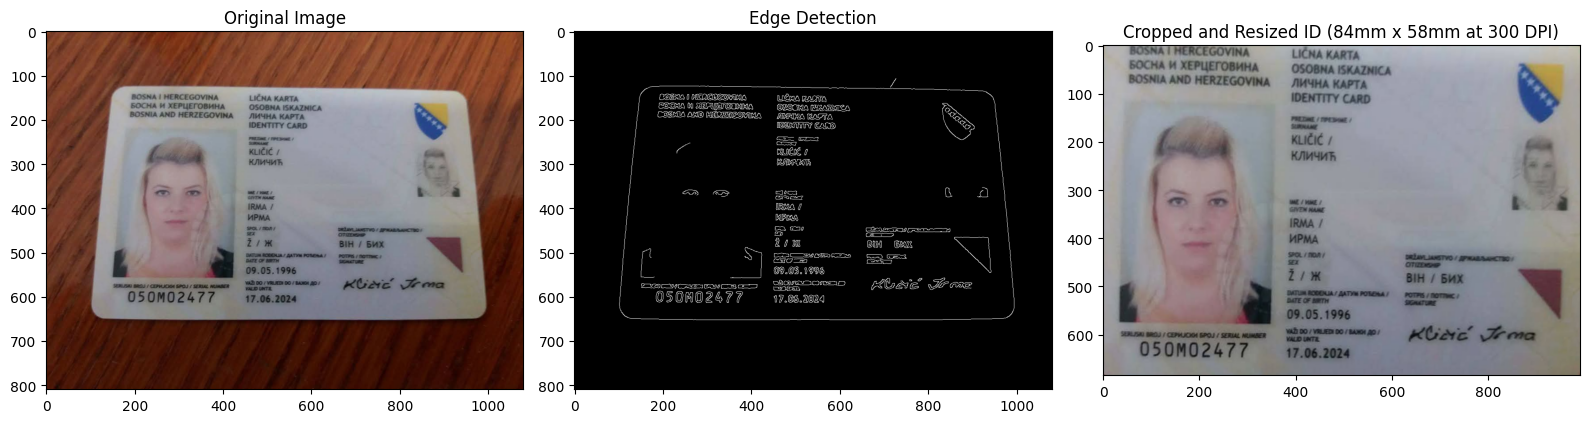

Cropped Picture Results:
Width: 991 pixels
Height: 685 pixels


In [1]:
# Install required libraries (if not already installed)
!pip install opencv-python-headless matplotlib

# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to the image in Google Drive
image_path = "/content/drive/MyDrive/MyFolder/passport/FB_IMG_2.jpg"

# Read the image
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise and improve edge detection
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Detect edges using the Canny method
edges = cv2.Canny(blurred, 50, 150)

# Find contours based on the edges
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the largest contour (assumed to be the ID card)
largest_contour = max(contours, key=cv2.contourArea)

# Approximate the contour to a polygon
epsilon = 0.02 * cv2.arcLength(largest_contour, True)
approx = cv2.approxPolyDP(largest_contour, epsilon, True)

# Ensure the contour has four points (indicating a quadrilateral)
if len(approx) == 4:
    # Sort points in a consistent order: top-left, top-right, bottom-right, bottom-left
    points = approx.reshape(4, 2)
    points = sorted(points, key=lambda x: (x[1], x[0]))  # Sort by y, then x

    top_points = sorted(points[:2], key=lambda x: x[0])  # Sort top two by x
    bottom_points = sorted(points[2:], key=lambda x: x[0])  # Sort bottom two by x

    ordered_points = np.array([top_points[0], top_points[1], bottom_points[1], bottom_points[0]], dtype="float32")

    # Define the target size in pixels for 84 mm x 58 mm at 300 DPI
    target_width = 991  # pixels
    target_height = 685  # pixels

    # Destination points for the perspective transformation
    dst_points = np.array([[0, 0], [target_width - 1, 0], [target_width - 1, target_height - 1], [0, target_height - 1]], dtype="float32")

    # Compute the perspective transform matrix and apply it
    matrix = cv2.getPerspectiveTransform(ordered_points, dst_points)
    warped = cv2.warpPerspective(image, matrix, (target_width, target_height))

    # Display the results
    plt.figure(figsize=(16, 8))
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    plt.subplot(1, 3, 2)
    plt.title("Edge Detection")
    plt.imshow(edges, cmap='gray')

    plt.subplot(1, 3, 3)
    plt.title(f"Cropped and Resized ID (84mm x 58mm at 300 DPI)")
    plt.imshow(cv2.cvtColor(warped, cv2.COLOR_BGR2RGB))

    plt.tight_layout()
    plt.show()

    # Print the dimensions of the final image
    print("Cropped Picture Results:")
    print(f"Width: {warped.shape[1]} pixels")
    print(f"Height: {warped.shape[0]} pixels")
else:
    print("The detected contour does not have four sides and cannot be warped.")

In [2]:
# Install required libraries (if not already installed)
!pip install opencv-python-headless matplotlib pytesseract

# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract  # For OCR

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to the image in Google Drive
image_path = "/content/drive/MyDrive/MyFolder/passport/FB_IMG_2.jpg"

# Read the image
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise and improve edge detection
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Detect edges using the Canny method
edges = cv2.Canny(blurred, 50, 150)

# Find contours based on the edges
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the largest contour (assumed to be the ID card)
largest_contour = max(contours, key=cv2.contourArea)

# Approximate the contour to a polygon
epsilon = 0.02 * cv2.arcLength(largest_contour, True)
approx = cv2.approxPolyDP(largest_contour, epsilon, True)

# Ensure the contour has four points (indicating a quadrilateral)
if len(approx) == 4:
    # Sort points in a consistent order: top-left, top-right, bottom-right, bottom-left
    points = approx.reshape(4, 2)
    points = sorted(points, key=lambda x: (x[1], x[0]))  # Sort by y, then x

    top_points = sorted(points[:2], key=lambda x: x[0])  # Sort top two by x
    bottom_points = sorted(points[2:], key=lambda x: x[0])  # Sort bottom two by x

    ordered_points = np.array([top_points[0], top_points[1], bottom_points[1], bottom_points[0]], dtype="float32")

    # Define the target size in pixels for 84 mm x 58 mm at 300 DPI
    target_width = 991  # pixels
    target_height = 685  # pixels

    # Destination points for the perspective transformation
    dst_points = np.array([[0, 0], [target_width - 1, 0], [target_width - 1, target_height - 1], [0, target_height - 1]], dtype="float32")

    # Compute the perspective transform matrix and apply it
    matrix = cv2.getPerspectiveTransform(ordered_points, dst_points)
    warped = cv2.warpPerspective(image, matrix, (target_width, target_height))

    # Use Tesseract OCR to detect text
    ocr_result = pytesseract.image_to_data(warped, output_type=pytesseract.Output.DICT)

    # Find the location of "IDENTITY CARD"
    for i, text in enumerate(ocr_result["text"]):
        if "IDENTITY CARD" in text.upper():
            x, y, w, h = (ocr_result["left"][i], ocr_result["top"][i],
                          ocr_result["width"][i], ocr_result["height"][i])

            # Draw a rectangle and label around the detected text
            cv2.rectangle(warped, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(warped, "IDENTITY CARD", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

    # Display the results
    plt.figure(figsize=(16, 8))
    plt.subplot(1, 4, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    plt.subplot(1, 4, 2)
    plt.title("Edge Detection")
    plt.imshow(edges, cmap='gray')

    plt.subplot(1, 4, 3)
    plt.title("Cropped and Resized ID (84mm x 58mm)")
    plt.imshow(cv2.cvtColor(warped, cv2.COLOR_BGR2RGB))

    plt.subplot(1, 4, 4)
    plt.title("Annotated with 'IDENTITY CARD'")
    plt.imshow(cv2.cvtColor(warped, cv2.COLOR_BGR2RGB))

    plt.tight_layout()
    plt.show()

    # Print the dimensions of the final image
    print("Cropped Picture Results:")
    print(f"Width: {warped.shape[1]} pixels")
    print(f"Height: {warped.shape[0]} pixels")
else:
    print("The detected contour does not have four sides and cannot be warped.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

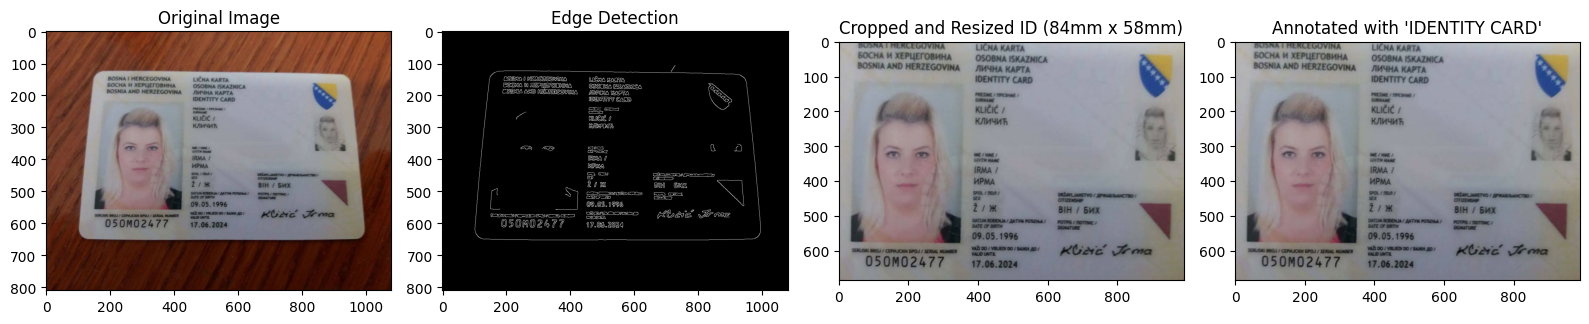

Cropped Picture Results:
Width: 991 pixels
Height: 685 pixels


In [4]:
# Install required libraries
!apt-get update
!apt-get install -y tesseract-ocr
!pip install pytesseract opencv-python-headless matplotlib

# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract  # For OCR

# Configure pytesseract to use the correct Tesseract executable path
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to the image in Google Drive
image_path = "/content/drive/MyDrive/MyFolder/passport/FB_IMG_2.jpg"

# Read the image
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise and improve edge detection
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Detect edges using the Canny method
edges = cv2.Canny(blurred, 50, 150)

# Find contours based on the edges
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the largest contour (assumed to be the ID card)
largest_contour = max(contours, key=cv2.contourArea)

# Approximate the contour to a polygon
epsilon = 0.02 * cv2.arcLength(largest_contour, True)
approx = cv2.approxPolyDP(largest_contour, epsilon, True)

# Ensure the contour has four points (indicating a quadrilateral)
if len(approx) == 4:
    # Sort points in a consistent order: top-left, top-right, bottom-right, bottom-left
    points = approx.reshape(4, 2)
    points = sorted(points, key=lambda x: (x[1], x[0]))  # Sort by y, then x

    top_points = sorted(points[:2], key=lambda x: x[0])  # Sort top two by x
    bottom_points = sorted(points[2:], key=lambda x: x[0])  # Sort bottom two by x

    ordered_points = np.array([top_points[0], top_points[1], bottom_points[1], bottom_points[0]], dtype="float32")

    # Define the target size in pixels for 84 mm x 58 mm at 300 DPI
    target_width = 991  # pixels
    target_height = 685  # pixels

    # Destination points for the perspective transformation
    dst_points = np.array([[0, 0], [target_width - 1, 0], [target_width - 1, target_height - 1], [0, target_height - 1]], dtype="float32")

    # Compute the perspective transform matrix and apply it
    matrix = cv2.getPerspectiveTransform(ordered_points, dst_points)
    warped = cv2.warpPerspective(image, matrix, (target_width, target_height))

    # Use Tesseract OCR to detect text
    ocr_result = pytesseract.image_to_data(warped, output_type=pytesseract.Output.DICT)

    # Find the location of "IDENTITY"
    for i, text in enumerate(ocr_result["text"]):
        if "IDENTITY" in text.upper():
            x, y, w, h = (ocr_result["left"][i], ocr_result["top"][i],
                          ocr_result["width"][i], ocr_result["height"][i])

            # Draw a rectangle and label around the detected text
            cv2.rectangle(warped, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(warped, "IDENTITY", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

    # Display the results
    plt.figure(figsize=(16, 8))
    plt.subplot(1, 4, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    plt.subplot(1, 4, 2)
    plt.title("Edge Detection")
    plt.imshow(edges, cmap='gray')

    plt.subplot(1, 4, 3)
    plt.title("Cropped and Resized ID (84mm x 58mm)")
    plt.imshow(cv2.cvtColor(warped, cv2.COLOR_BGR2RGB))

    plt.subplot(1, 4, 4)
    plt.title("Annotated with 'IDENTITY CARD'")
    plt.imshow(cv2.cvtColor(warped, cv2.COLOR_BGR2RGB))

    plt.tight_layout()
    plt.show()

    # Print the dimensions of the final image
    print("Cropped Picture Results:")
    print(f"Width: {warped.shape[1]} pixels")
    print(f"Height: {warped.shape[0]} pixels")
else:
    print("The detected contour does not have four sides and cannot be warped.")

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

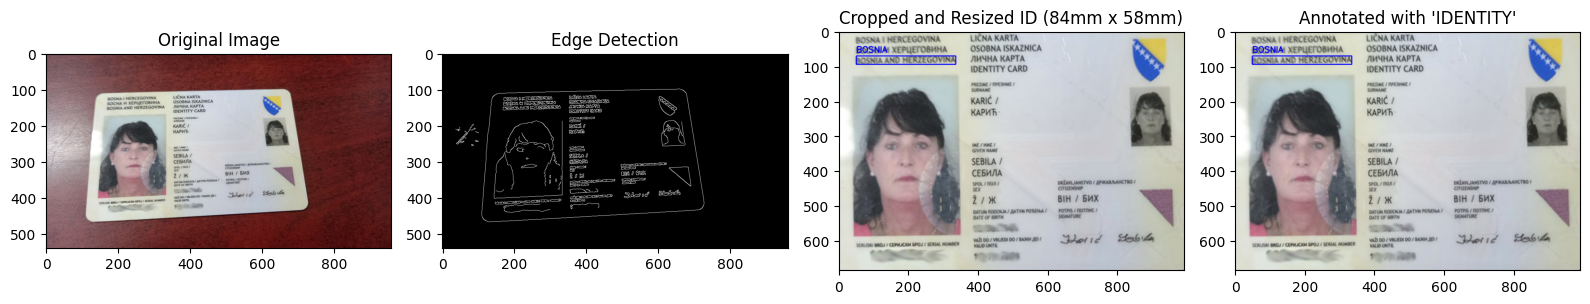

Cropped Picture Results:
Width: 991 pixels
Height: 685 pixels


In [14]:
# Install required libraries
!apt-get update
!apt-get install -y tesseract-ocr
!pip install pytesseract opencv-python-headless matplotlib

# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract  # For OCR

# Configure pytesseract to use the correct Tesseract executable path
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to the image in Google Drive
image_path = "/content/drive/MyDrive/MyFolder/passport/bih_001.jpg"


# Read the image
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise and improve edge detection
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Detect edges using the Canny method
edges = cv2.Canny(blurred, 50, 150)

# Find contours based on the edges
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the largest contour (assumed to be the ID card)
largest_contour = max(contours, key=cv2.contourArea)

# Approximate the contour to a polygon
epsilon = 0.02 * cv2.arcLength(largest_contour, True)
approx = cv2.approxPolyDP(largest_contour, epsilon, True)

# Ensure the contour has four points (indicating a quadrilateral)
if len(approx) == 4:
    # Sort points in a consistent order: top-left, top-right, bottom-right, bottom-left
    points = approx.reshape(4, 2)
    points = sorted(points, key=lambda x: (x[1], x[0]))  # Sort by y, then x

    top_points = sorted(points[:2], key=lambda x: x[0])  # Sort top two by x
    bottom_points = sorted(points[2:], key=lambda x: x[0])  # Sort bottom two by x

    ordered_points = np.array([top_points[0], top_points[1], bottom_points[1], bottom_points[0]], dtype="float32")

    # Define the target size in pixels for 84 mm x 58 mm at 300 DPI
    target_width = 991  # pixels
    target_height = 685  # pixels

    # Destination points for the perspective transformation
    dst_points = np.array([[0, 0], [target_width - 1, 0], [target_width - 1, target_height - 1], [0, target_height - 1]], dtype="float32")

    # Compute the perspective transform matrix and apply it
    matrix = cv2.getPerspectiveTransform(ordered_points, dst_points)
    warped = cv2.warpPerspective(image, matrix, (target_width, target_height))

    # Use Tesseract OCR to detect text
    ocr_result = pytesseract.image_to_data(warped, output_type=pytesseract.Output.DICT)

    # Print all extracted text
    print("Extracted Text:")
    for i, text in enumerate(ocr_result["text"]):
        if text.strip():
            print(f"Line {i + 1}: {text.strip()}")

    # Find the location of "BOSNIA"
    for i, text in enumerate(ocr_result["text"]):
        if "BOSNIA" in text.upper():
            x, y, w, h = (ocr_result["left"][i], ocr_result["top"][i],
                          ocr_result["width"][i], ocr_result["height"][i])

            # Draw a red rectangle around the detected text
            cv2.rectangle(warped, (x, y), (x + w, y + h), (255, 0, 0), 2)
            cv2.putText(warped, "BOSNIA", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

    # Display the results
    plt.figure(figsize=(16, 8))
    plt.subplot(1, 4, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    plt.subplot(1, 4, 2)
    plt.title("Edge Detection")
    plt.imshow(edges, cmap='gray')

    plt.subplot(1, 4, 3)
    plt.title("Cropped and Resized ID (84mm x 58mm)")
    plt.imshow(cv2.cvtColor(warped, cv2.COLOR_BGR2RGB))

    plt.subplot(1, 4, 4)
    plt.title("Annotated with 'IDENTITY'")
    plt.imshow(cv2.cvtColor(warped, cv2.COLOR_BGR2RGB))

    plt.tight_layout()
    plt.show()

    # Print the dimensions of the final image
    print("Cropped Picture Results:")
    print(f"Width: {warped.shape[1]} pixels")
    print(f"Height: {warped.shape[0]} pixels")
else:
    print("The detected contour does not have four sides and cannot be warped.")